In [1]:
import sys
sys.path = ['',
 '/cm/shared/sw/pkg-old/devel/python2/2.7.13/bin',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python27.zip',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/plat-linux2',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/lib-tk',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/lib-old',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/lib-dynload',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/site-packages',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/site-packages/IPython/extensions',
 '/mnt/home/llevasseur/.ipython']

In [2]:
import tensorflow as tf
import numpy as np

tf.enable_eager_execution()

/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
execfile("AE_RIM_definitions.py")

npix_side = 512

import matplotlib.pyplot as plt
%matplotlib inline  
from IPython import display
import pylab as pl



In [4]:
src_side = 20.48
im_side = 20.48
train_batch_size = 10

sk_gen = SRC_KAPPA_Generator(train_batch_size=train_batch_size,test_batch_size=train_batch_size,kap_side_length=im_side, num_src_side=npix_side,num_kappa_side=npix_side,src_side=src_side)

noise_rms = 0.01
sk_gen.draw_k_s("test")

In [5]:
VAE_obj = VAE(n_latent = 64 , npix_side = npix_side)
checkpoint_path = "checkpoints/model_VAE_512"
VAE_obj.load_weights(checkpoint_path)

In [16]:
AE = AUTOENCODER(loadsave_file_name = "checkpoints/AE_VAE_weights")
AE.Load()

In [38]:
# for train_iter in range(10000):
#     print train_iter
logkap =  tf.reshape(VAE_obj.draw_image(train_batch_size), (-1,npix_side,npix_side,1) )
#     AE.train(tf.identity(logkap), optimizer)
_, code, _ = VAE_obj.encoder(tf.identity(logkap))
decoded_im = VAE_obj.decoder(code)

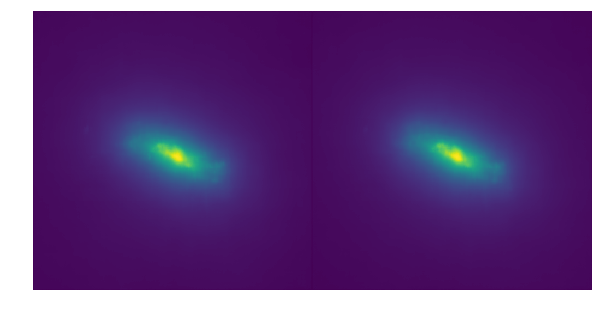

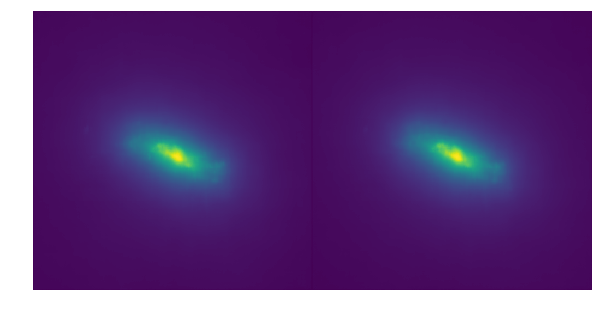

In [39]:
#     if (((train_iter+1)%10)==0):
#         output = AE.forward_pass(tf.identity(logkap))
pl.clf()
fig, ax = pl.subplots(1, 2, figsize = (10, 15))
pl.subplots_adjust(wspace = 0, hspace = 0)
imsrcP = ax[0].imshow(logkap[0,:,:,0])

imsrcT = ax[1].imshow(decoded_im[0,:,:].numpy())
ax[0].axis('off')
ax[1].axis('off')
display.clear_output(wait=True)
display.display(pl.gcf())


In [17]:
optimizer = tf.train.AdamOptimizer(1e-4)

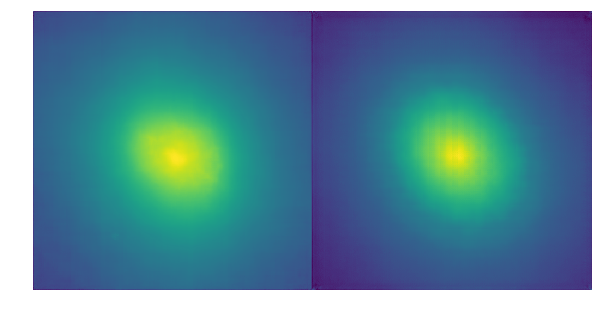

saved


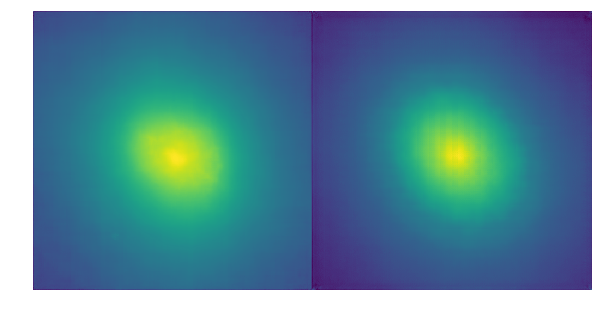

In [18]:
for train_iter in range(10000):
    print train_iter
    #sk_gen.draw_k_s("train")
    #logkap = np.log10(sk_gen.Kappa_tr[:,:,:,:])
    #src = sk_gen.Source_tr[:,:,:,:]
    logkap = log10(tf.random_uniform(shape=[1],minval=0, maxval=5) * tf.reshape(VAE_obj.draw_image(train_batch_size), (-1,npix_side,npix_side,1) ))
    AE.train(tf.identity(logkap), optimizer)

    if (((train_iter+1)%10)==0):
        output = AE.forward_pass(tf.identity(logkap))
        pl.clf()
        fig, ax = pl.subplots(1, 2, figsize = (10, 15))
        pl.subplots_adjust(wspace = 0, hspace = 0)
        imsrcP = ax[0].imshow(logkap[0,:,:,0])

        imsrcT = ax[1].imshow(output[0,:,:,0].numpy())
        ax[0].axis('off')
        ax[1].axis('off')
        display.clear_output(wait=True)
        display.display(pl.gcf())
    if (((train_iter+1)%40)==0):
        AE.Save()
        print "saved"

